In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import os

In [118]:
df = pd.read_csv('./data/cardio_train.csv', sep=';')
print('Shape: ', df.shape)
df.head()

Shape:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [119]:
print(df.info())
print(df.describe())
print(df['cardio'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571

/var/folders/n3/j2_kdzfs0w739xrky30jrfy80000gn/T/ipykernel_2292/191879310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cardio', data=df, palette='Set2')


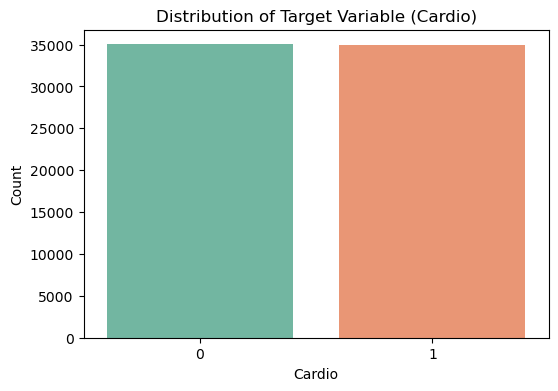

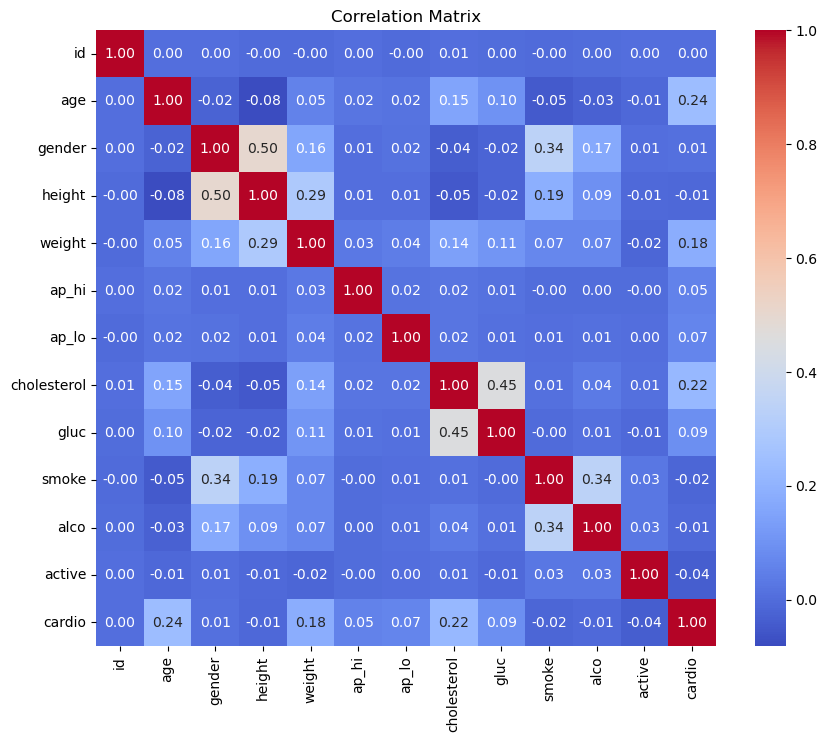

In [120]:
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=df, palette='Set2')
plt.title('Distribution of Target Variable (Cardio)')
plt.xlabel('Cardio')
plt.ylabel('Count')
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

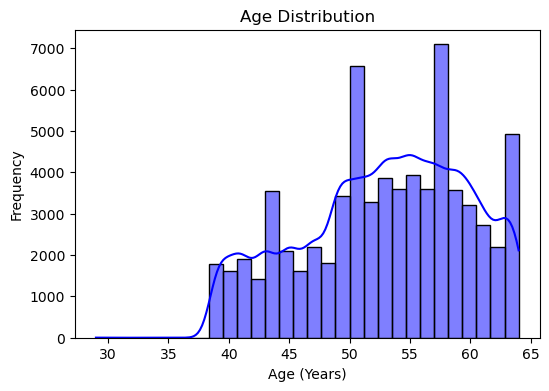

/var/folders/n3/j2_kdzfs0w739xrky30jrfy80000gn/T/ipykernel_2292/3815227593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set3')


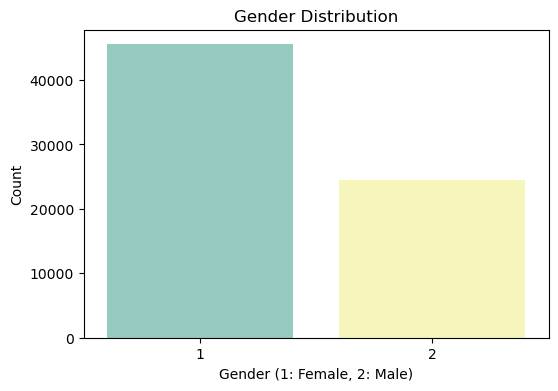

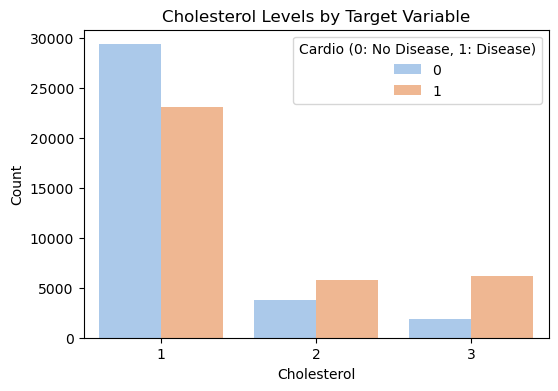

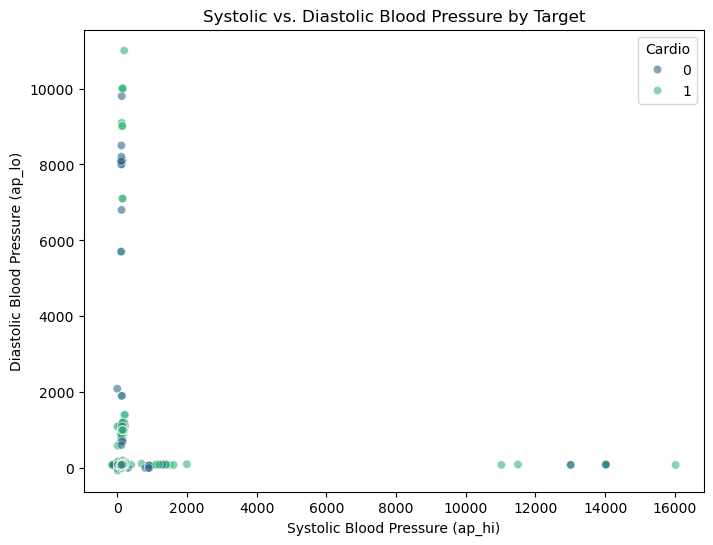

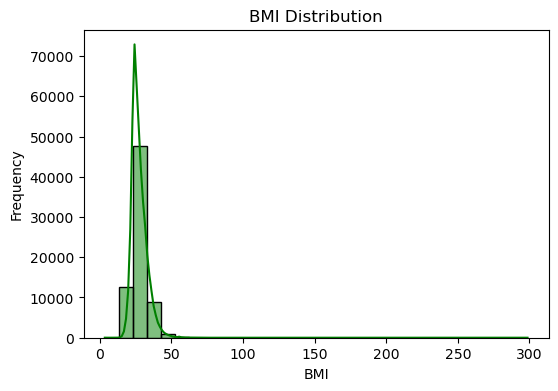

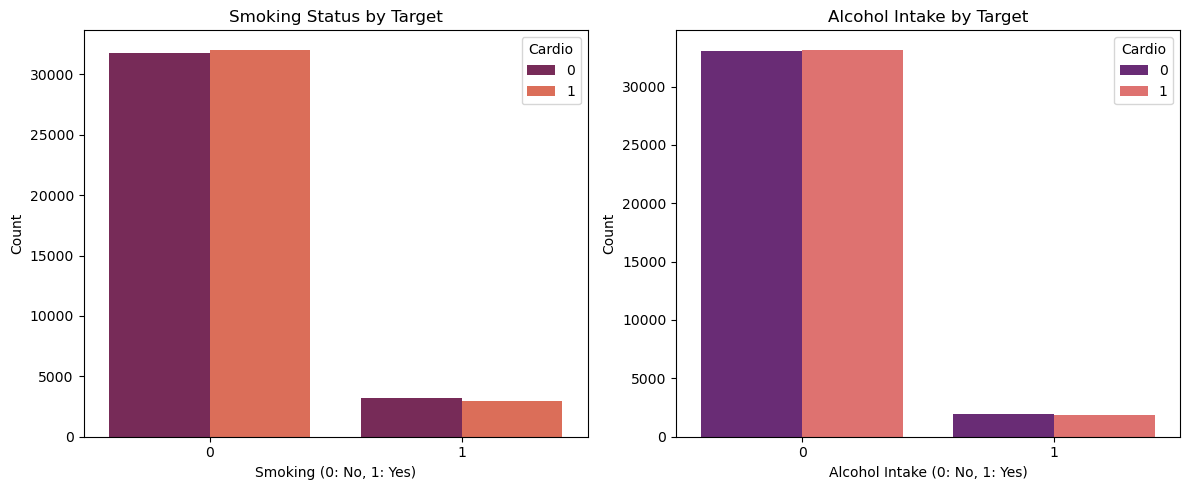

In [121]:
df['age_years'] = df['age'] // 365 
plt.figure(figsize=(6, 4))
sns.histplot(df['age_years'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='Set3')
plt.title('Gender Distribution')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='cholesterol', hue='cardio', data=df, palette='pastel')
plt.title('Cholesterol Levels by Target Variable')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend(title='Cardio (0: No Disease, 1: Disease)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=df, palette='viridis', alpha=0.6)
plt.title('Systolic vs. Diastolic Blood Pressure by Target')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.legend(title='Cardio')
plt.show()

df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
plt.figure(figsize=(6, 4))
sns.histplot(df['BMI'], bins=30, kde=True, color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='smoke', hue='cardio', data=df, palette='rocket')
plt.title('Smoking Status by Target')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Cardio')

plt.subplot(1, 2, 2)
sns.countplot(x='alco', hue='cardio', data=df, palette='magma')
plt.title('Alcohol Intake by Target')
plt.xlabel('Alcohol Intake (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Cardio')

plt.tight_layout()
plt.show()

In [122]:
df_processed = df.copy()

df_processed = df_processed[(df_processed['ap_hi'] > 50) & (df_processed['ap_hi'] < 250)]
df_processed = df_processed[(df_processed['ap_lo'] > 30) & (df_processed['ap_lo'] < 200)]

print(f"Shape after removing outliers: {df_processed.shape}")

df_processed['BMI'] = df_processed['weight'] / ((df_processed['height'] / 100) ** 2)

categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for col in categorical_columns:
    print(f"Unique values in {col}: {df_processed[col].unique()}")

numerical_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']

scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

columns_to_drop = ['age', 'id']
df_processed.drop(columns=[col for col in columns_to_drop if col in df_processed.columns], inplace=True)

print(f"Final dataset shape: {df_processed.shape}")

X = df_processed.drop(columns=['cardio'])
y = df_processed['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Shape after removing outliers: (68775, 15)
Unique values in gender: [2 1]
Unique values in cholesterol: [1 3 2]
Unique values in gluc: [1 2 3]
Unique values in smoke: [0 1]
Unique values in alco: [0 1]
Unique values in active: [1 0]
Final dataset shape: (68775, 13)
Training set shape: (55020, 12)
Testing set shape: (13755, 12)


--- Logistic Regression ---
Accuracy: 0.7223
Precision: 0.7448
Recall: 0.6675
F1-Score: 0.7041
ROC-AUC: 0.7864

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6948
           1       0.74      0.67      0.70      6807

    accuracy                           0.72     13755
   macro avg       0.72      0.72      0.72     13755
weighted avg       0.72      0.72      0.72     13755



--- Random Forest ---
Accuracy: 0.7305
Precision: 0.7556
Recall: 0.6731
F1-Score: 0.7120
ROC-AUC: 0.7970

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6948
           1       0.76      0.67      0.71      6807

    accuracy                           0.73     13755
   macro avg       0.73      0.73      0.73     13755
weighted avg       0.73      0.73      0.73     13755





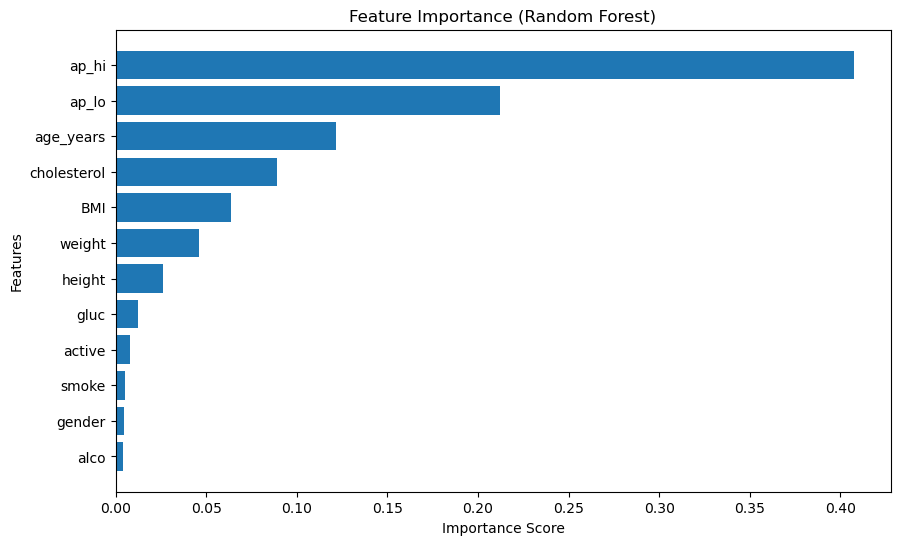

In [123]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]

def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\n")

evaluate_model("Logistic Regression", y_test, y_pred_log_reg, y_prob_log_reg)

evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)

feature_importances = random_forest.feature_importances_
features = X_train.columns

sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [124]:
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['lbfgs', 'liblinear']
}

log_reg = LogisticRegression(random_state=42, max_iter=1000)

grid_log_reg = GridSearchCV(
    estimator=log_reg,
    param_grid=log_reg_params,
    scoring='roc_auc',
    cv=5,  
    verbose=1,
    n_jobs=-1
)

grid_log_reg.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best ROC-AUC for Logistic Regression:", grid_log_reg.best_score_)

best_log_reg = grid_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
y_prob_log_reg = best_log_reg.predict_proba(X_test)[:, 1]

rf_params = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [5, 10, 20],       
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]    
}

random_forest = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    estimator=random_forest,
    param_grid=rf_params,
    scoring='roc_auc',
    cv=5,  
    verbose=1,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best ROC-AUC for Random Forest:", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

evaluate_model("Tuned Logistic Regression", y_test, y_pred_log_reg, y_prob_log_reg)
evaluate_model("Tuned Random Forest", y_test, y_pred_rf, y_prob_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best ROC-AUC for Logistic Regression: 0.791348860485962
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC-AUC for Random Forest: 0.80089557693403
--- Tuned Logistic Regression ---
Accuracy: 0.7224
Precision: 0.7451
Recall: 0.6674
F1-Score: 0.7041
ROC-AUC: 0.7864

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6948
           1       0.75      0.67      0.70      6807

    accuracy                           0.72     13755
   macro avg       0.72      0.72      0.72     13755
weighted avg       0.72      0.72      0.72     13755



--- Tuned Random Forest ---
Accuracy: 0.7312
Precision: 0.7526
Recall: 0.6806
F1-Score: 0.7148
ROC-AUC: 0.79